In [56]:
import matplotlib.pyplot as plt
import scienceplots
from tbparse import SummaryReader

plt.style.use('science')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams.update({'font.size': 18})

from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 200em; }</style>"))

/tmp/ipykernel_3012885/2653423383.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [44]:
exp_name = "2023-05-25_22:27:07"

# read data
reader = SummaryReader(f"runs/{exp_name}/", extra_columns=set(["dir_name"]))
df_central = reader.scalars

In [45]:
run_string = "Fix Match Seg"
window = 100
yLabel = "DiceLoss" 
xLabel = "Epoch"
nr_lines = 4

In [63]:
set(df_central.tag)

{'centralised/loss/batch',
 'centralised/loss/dataloader_counters',
 'centralised/loss/epoch',
 'centralised/loss/internal_counters',
 'centralised/loss/internal_variables'}

In [115]:
tag = "centralised/loss/epoch"
epoch_df = df_central[df_central.tag == tag]

def plot_line(df, curve_name, legend_name, xmax=None):
    xmax = len(df) if not xmax else xmax 
    tagged_df = df[["step", "value"]][df.dir_name == curve_name][:xmax]
    plt.plot(tagged_df["step"], tagged_df["value"], label=legend_name)
    plt.xlabel(xLabel), plt.ylabel(yLabel), plt.legend(), plt.grid() #, plt.title(title),
    
def plot_line_step(df, curve_name, legend_name, split_train, xmax=None):
    xmax = len(df) if not xmax else xmax 
    df['adjusted_step'] = df['step']*split_train
    tagged_df = df[["adjusted_step", "value"]][df.dir_name == curve_name][:xmax]
    plt.plot(tagged_df["adjusted_step"], tagged_df["value"], label=legend_name)
    plt.xlabel(xLabel), plt.ylabel(yLabel), plt.legend(), plt.grid() #, plt.title(title),

In [47]:
set(epoch_df.dir_name)

{'centralised_loss_epoch_supervised',
 'centralised_loss_epoch_train',
 'centralised_loss_epoch_unsupervised',
 'centralised_loss_epoch_validation'}

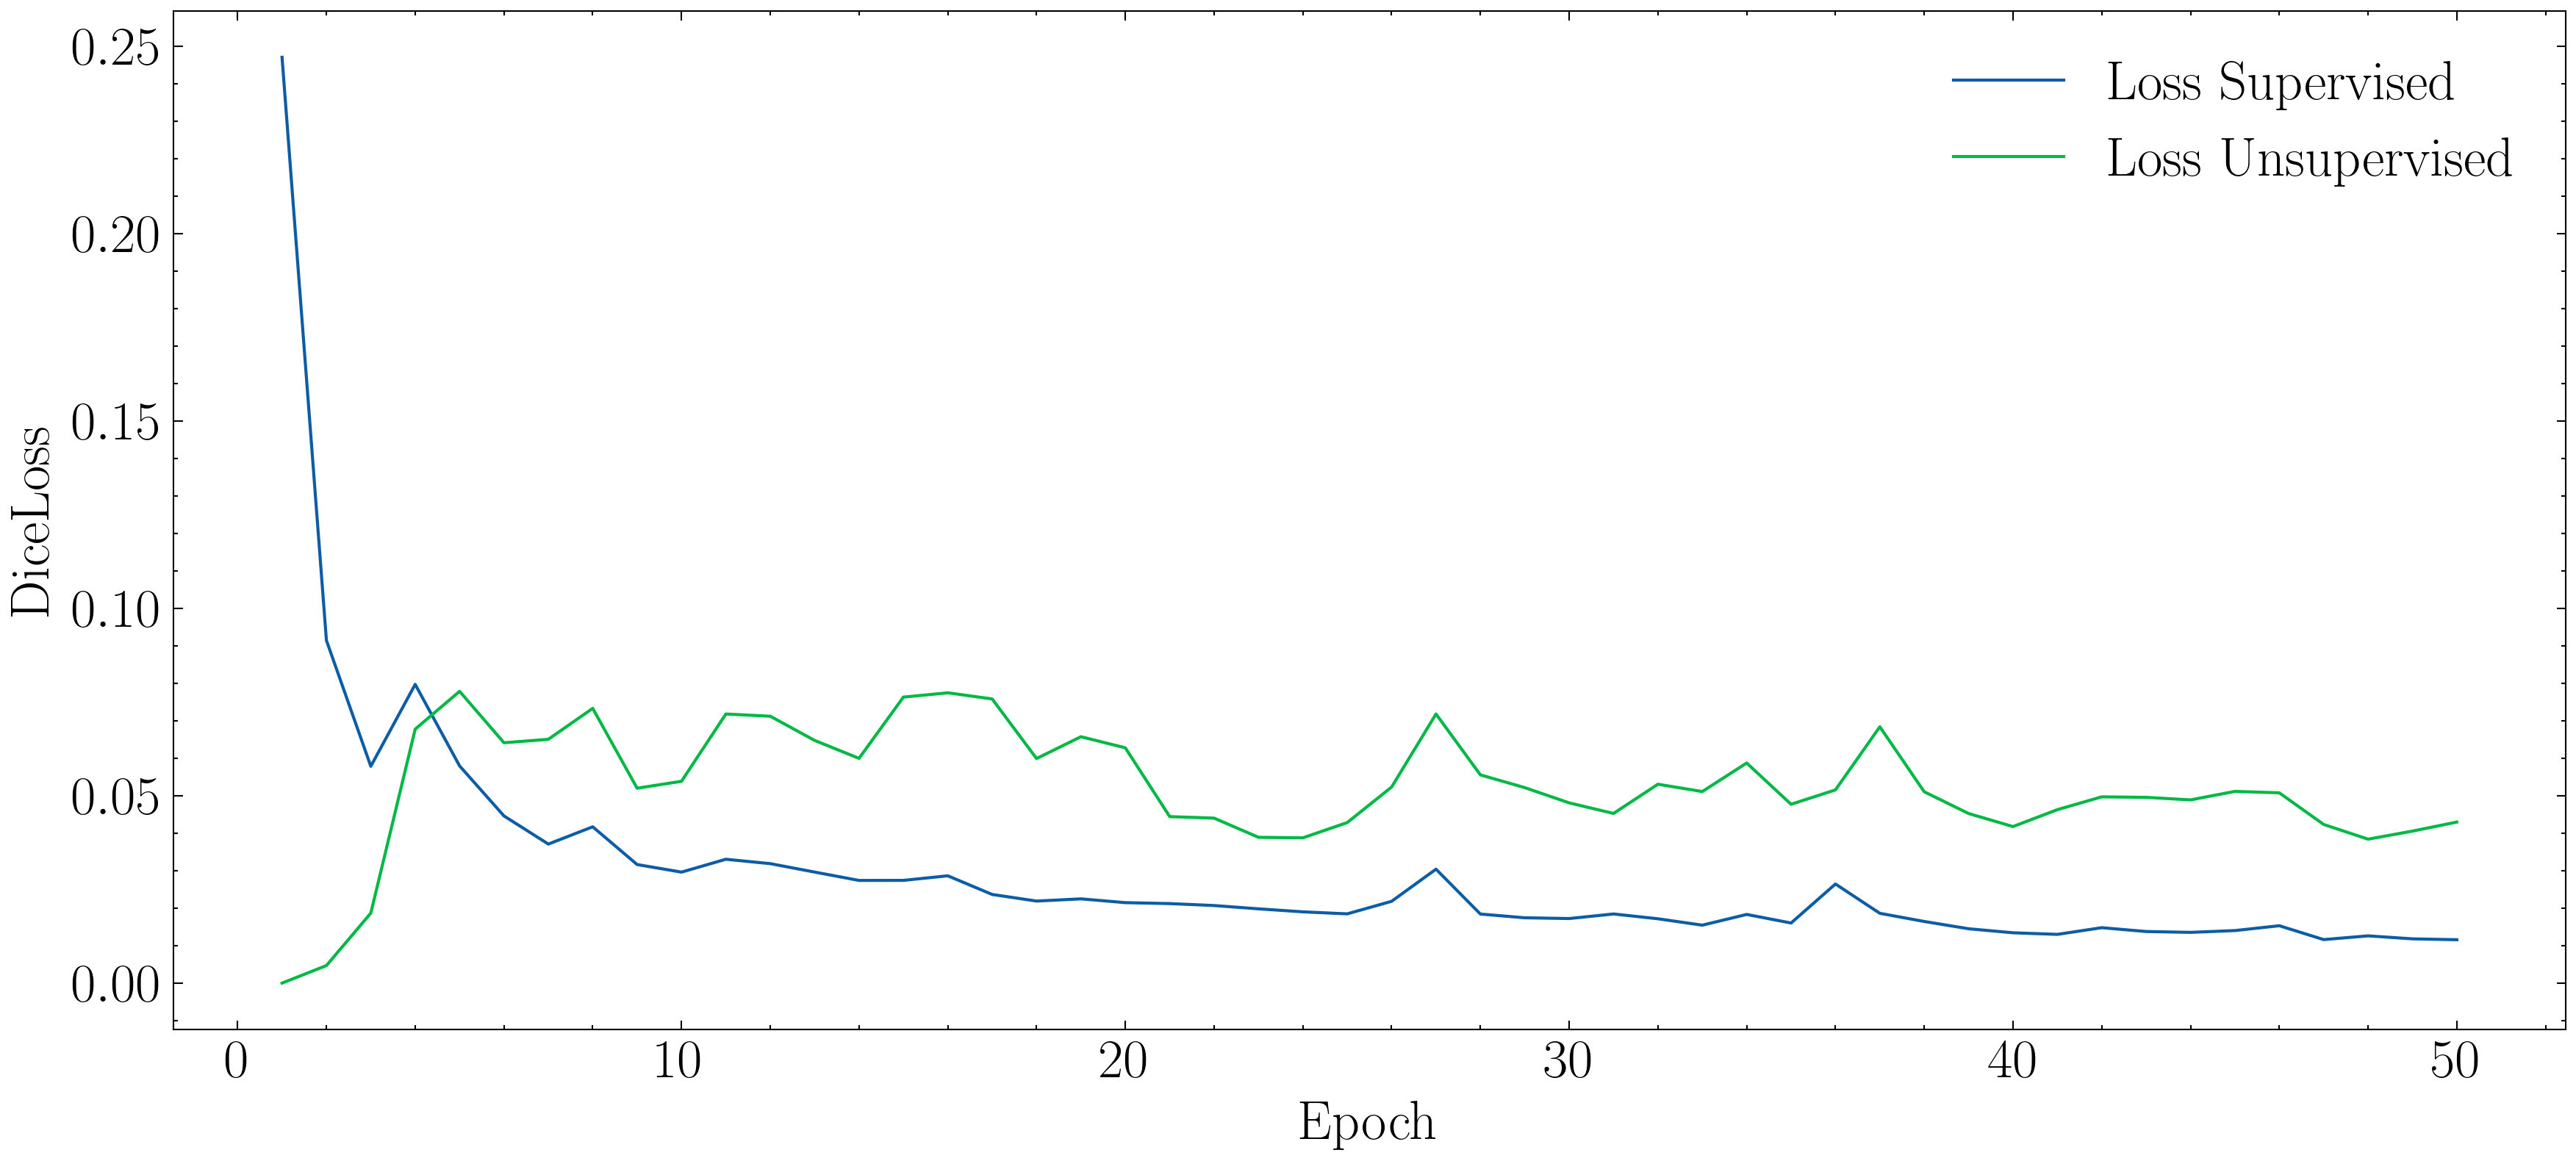

In [57]:
plot_line(epoch_df, 'centralised_loss_epoch_supervised', 'Loss Supervised')
plot_line(epoch_df, 'centralised_loss_epoch_unsupervised', 'Loss Unsupervised')
plt.savefig('fixmatchseg_loss_sup_unsup.png')

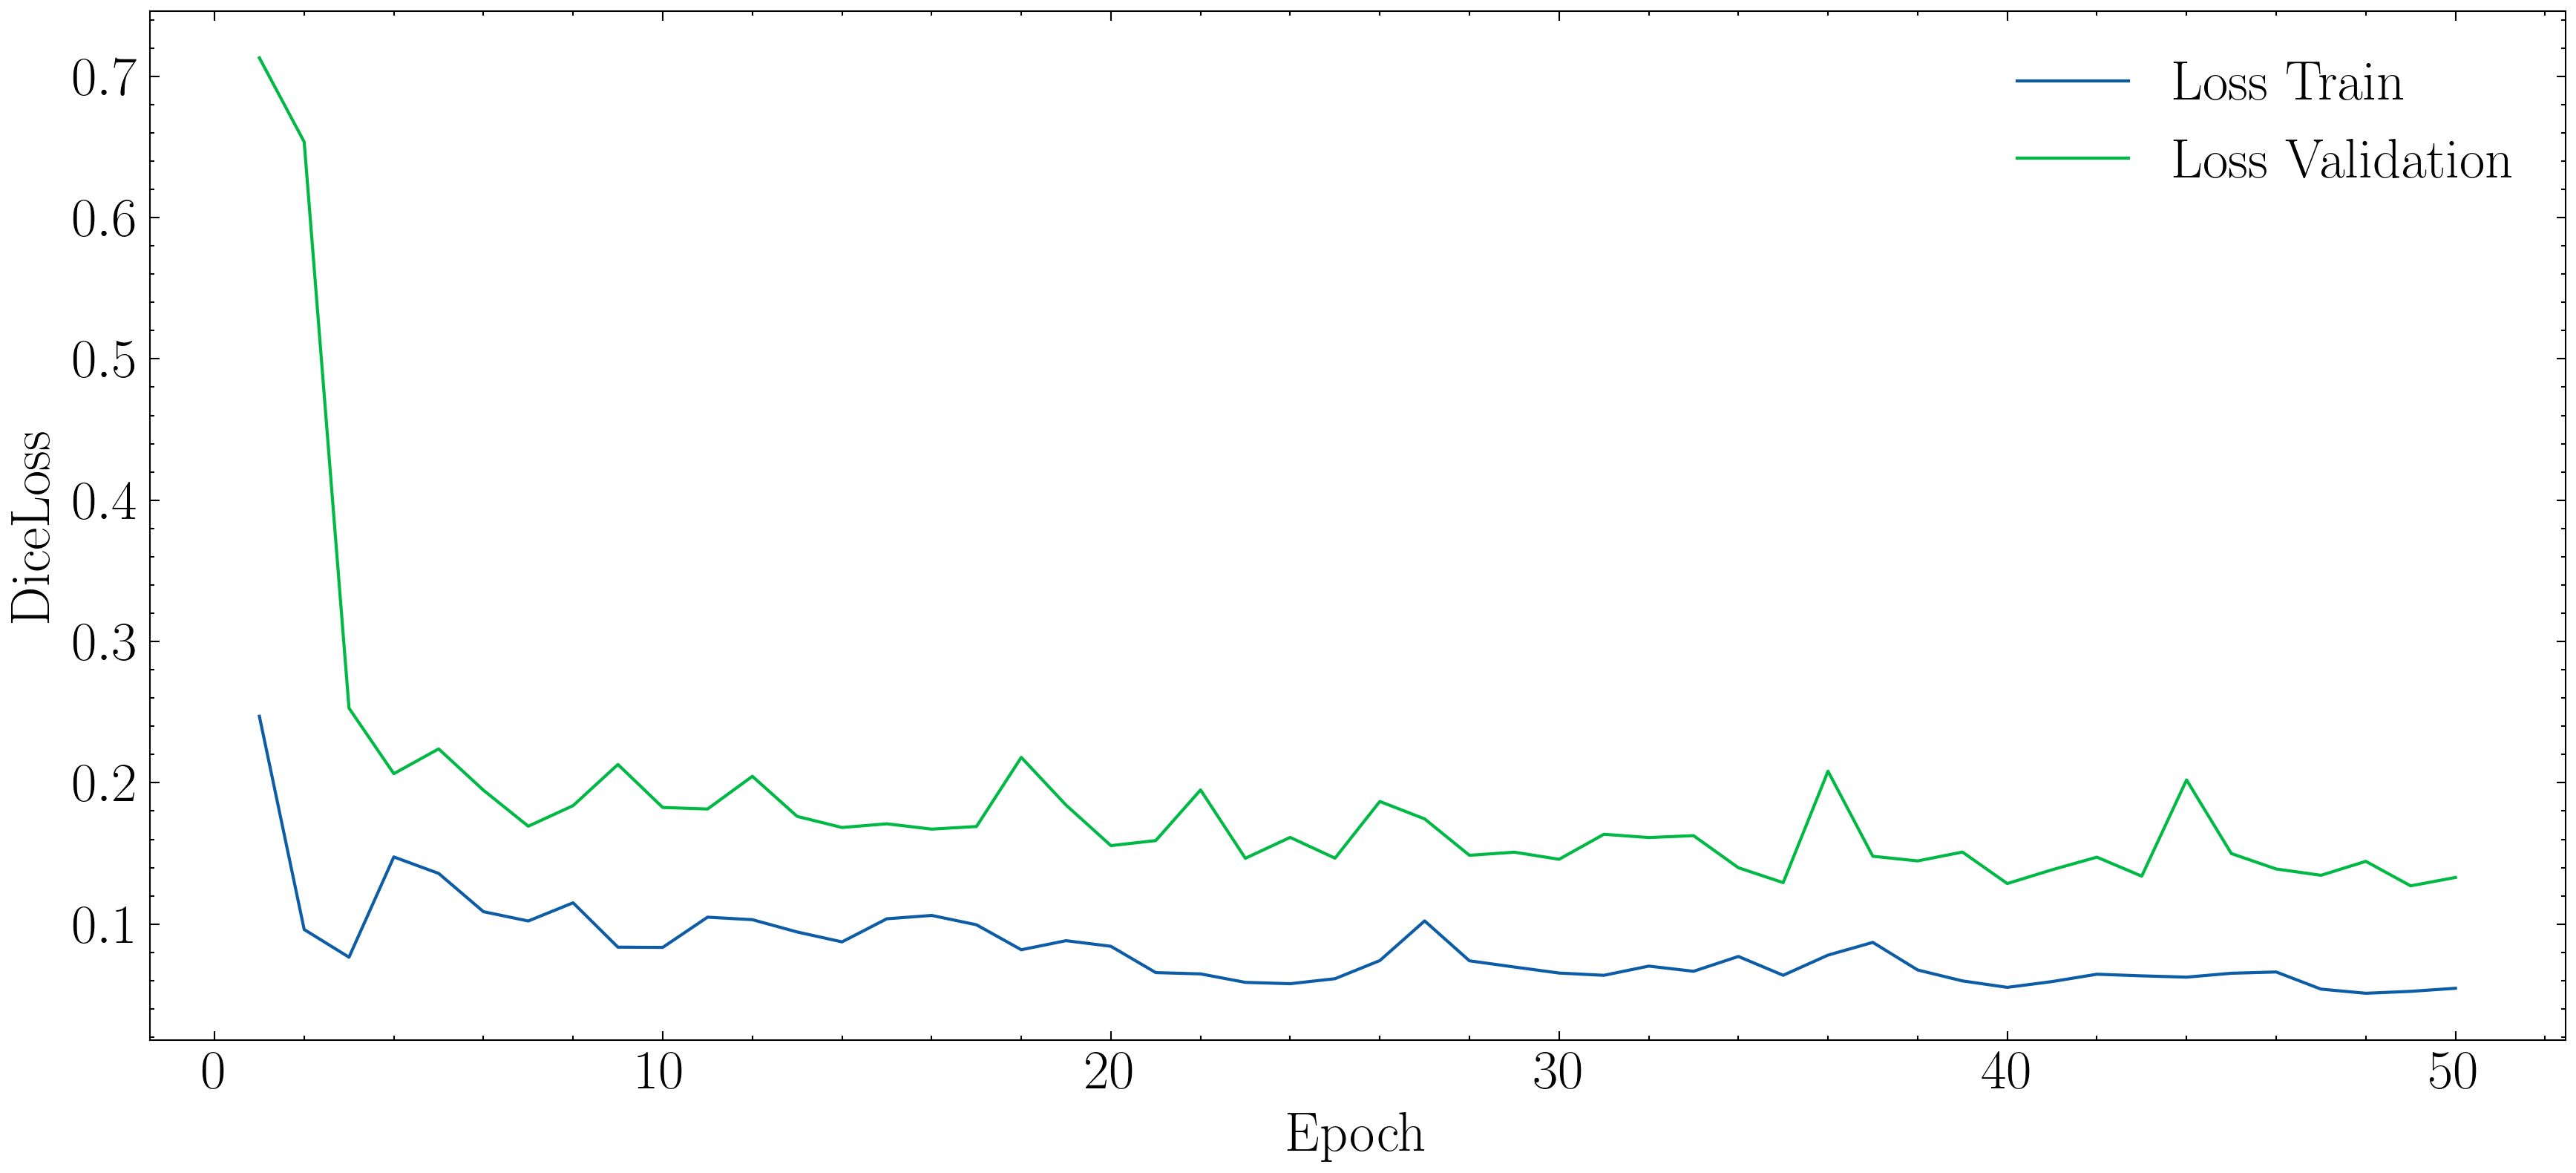

In [58]:
yLabel = "DiceLoss" 
xLabel = "Epoch"

plot_line(epoch_df, 'centralised_loss_epoch_train', 'Loss Train')
plot_line(epoch_df, 'centralised_loss_epoch_validation', 'Loss Validation')
plt.savefig('fixmatchseg_loss_train_val.png')

In [65]:
set(df_central.dir_name)

{'centralised_loss_batch_supervised',
 'centralised_loss_batch_train',
 'centralised_loss_batch_unsupervised',
 'centralised_loss_dataloader_counters_labelled batch index',
 'centralised_loss_dataloader_counters_unlabelled batch index',
 'centralised_loss_epoch_supervised',
 'centralised_loss_epoch_train',
 'centralised_loss_epoch_unsupervised',
 'centralised_loss_epoch_validation',
 'centralised_loss_internal_counters_utilised labelled',
 'centralised_loss_internal_counters_utilised unlabelled',
 'centralised_loss_internal_variables_mean_labelled_confidence',
 'centralised_loss_internal_variables_qb_bar_max',
 'centralised_loss_internal_variables_qb_bar_mean',
 'centralised_loss_internal_variables_qb_bar_min',
 'centralised_loss_internal_variables_tau'}

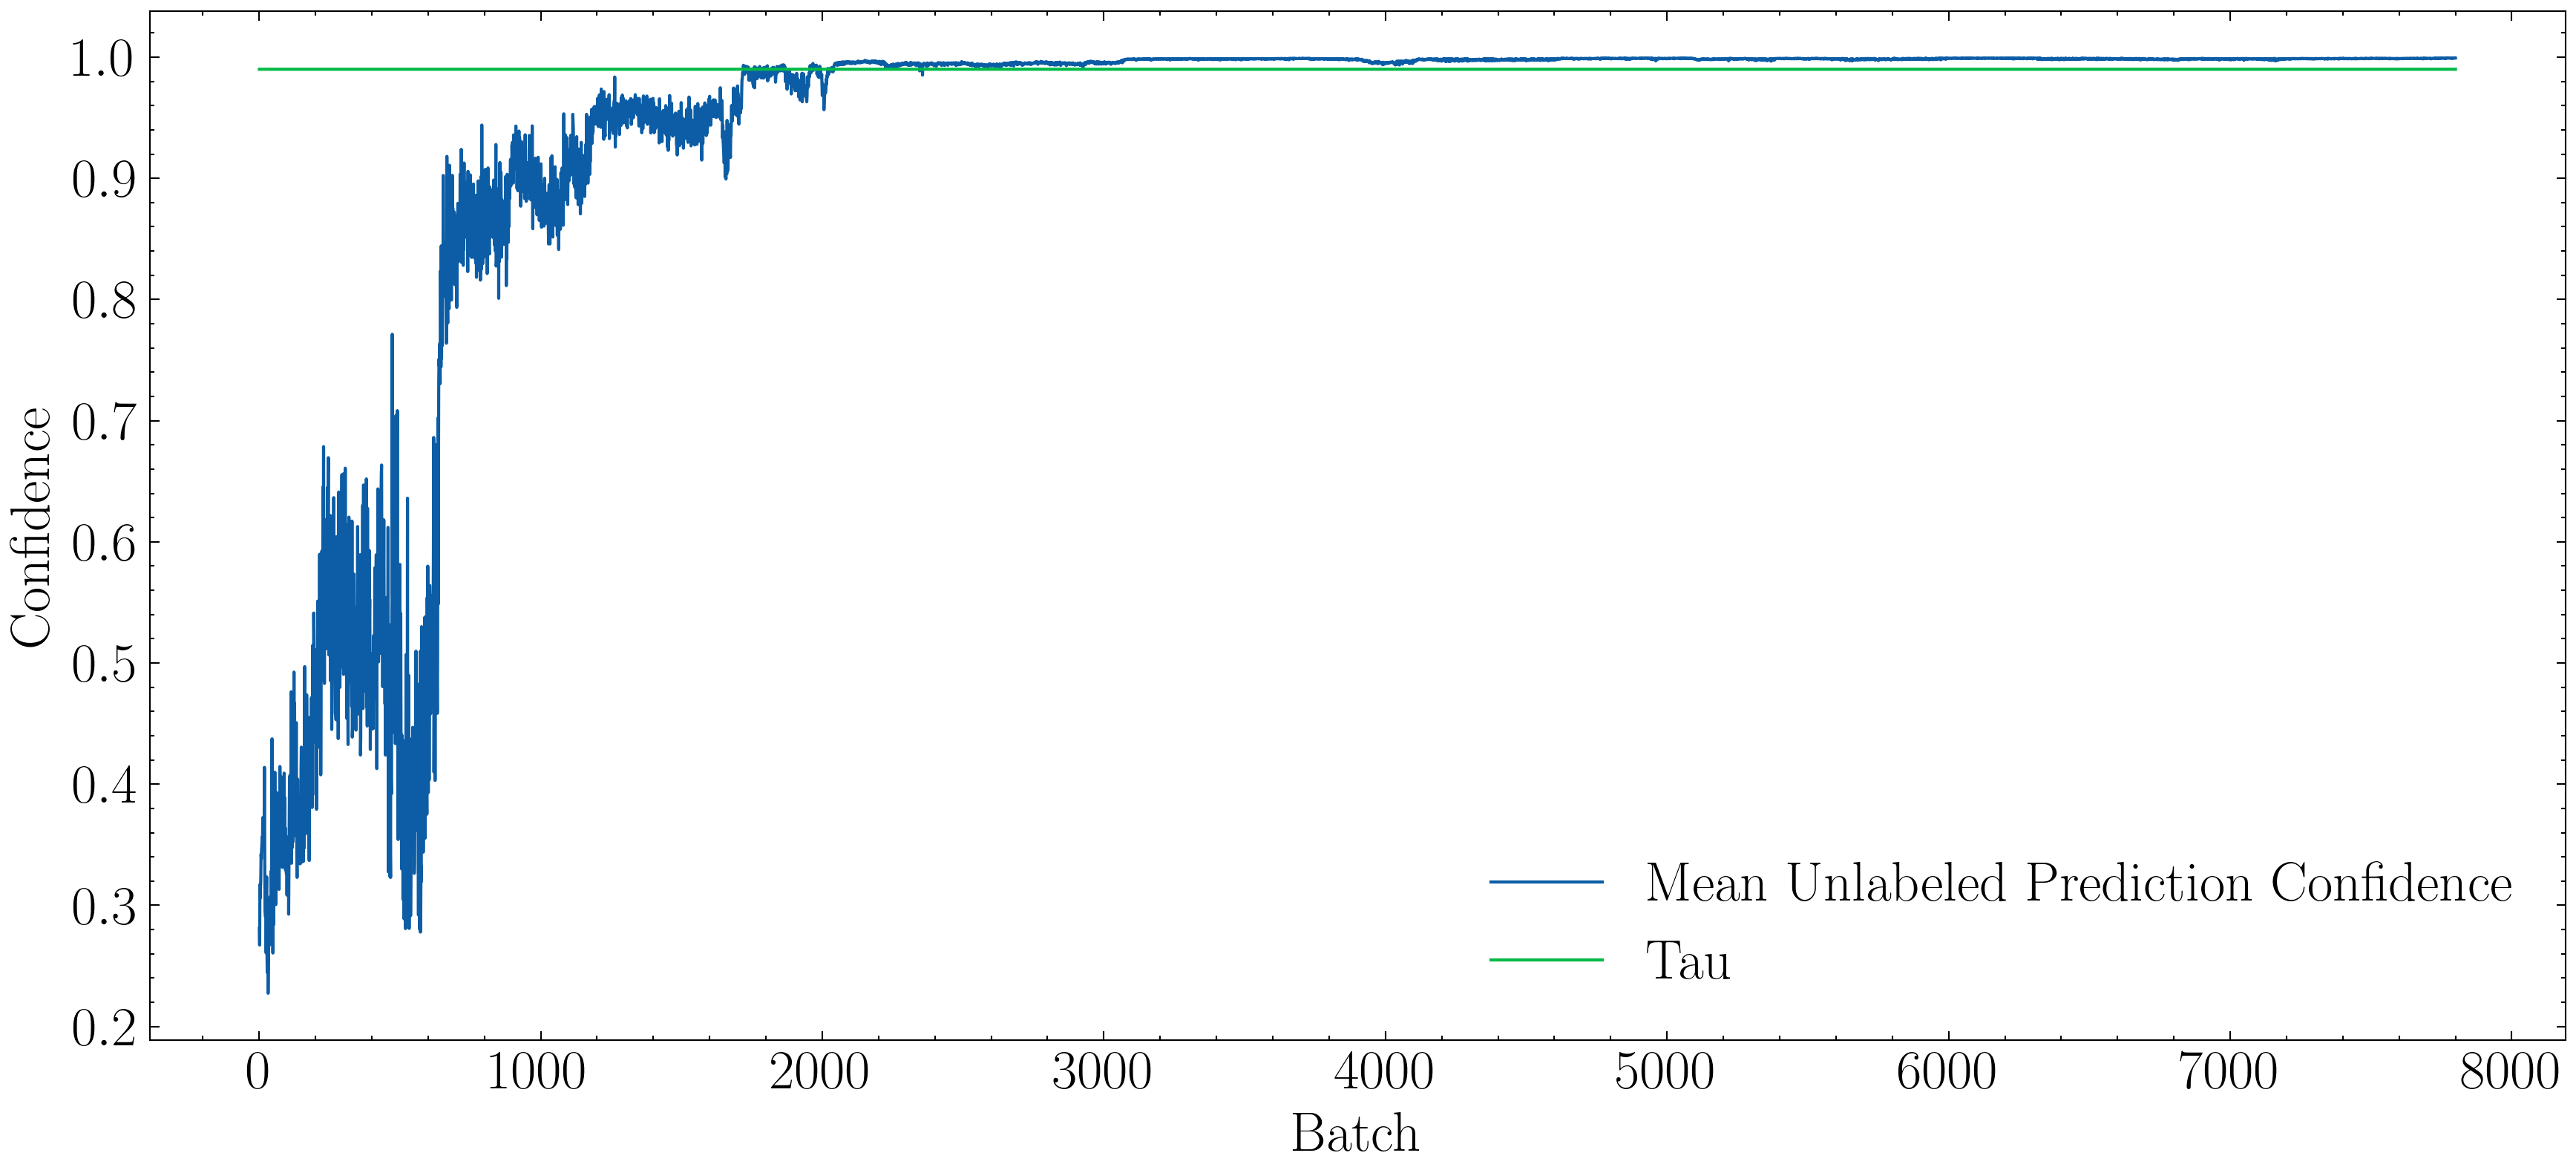

In [79]:
tag = "centralised/loss/internal_variables"
confidence_df = df_central[df_central.tag == tag]

yLabel = "Confidence" 
xLabel = "Batch"

plot_line(confidence_df, 'centralised_loss_internal_variables_qb_bar_mean', 'Mean Unlabeled Prediction Confidence')
plot_line(confidence_df, 'centralised_loss_internal_variables_tau', 'Tau')
plt.savefig('fixmatchseg_maen_pred_confidenece.png')

In [95]:
exp_name = "2023-05-26_20:29:00"
yLabel = "DiceLoss" 
xLabel = "Epoch"

# read data
reader = SummaryReader(f"runs/{exp_name}/", extra_columns=set(["dir_name"]))
df_sup = reader.scalars

In [81]:
set(df_sup.tag)

{'centralised/loss/batch',
 'centralised/loss/epoch',
 'centralised/loss/internal_counters',
 'centralised/loss/internal_variables'}

In [102]:
tag = "centralised/loss/epoch"
df = df_sup[df_sup.tag == tag]
set(df.dir_name)

{'centralised_loss_epoch_supervised',
 'centralised_loss_epoch_train',
 'centralised_loss_epoch_unsupervised',
 'centralised_loss_epoch_validation'}

/tmp/ipykernel_3012885/409704086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjusted_step'] = df['step']*split_train


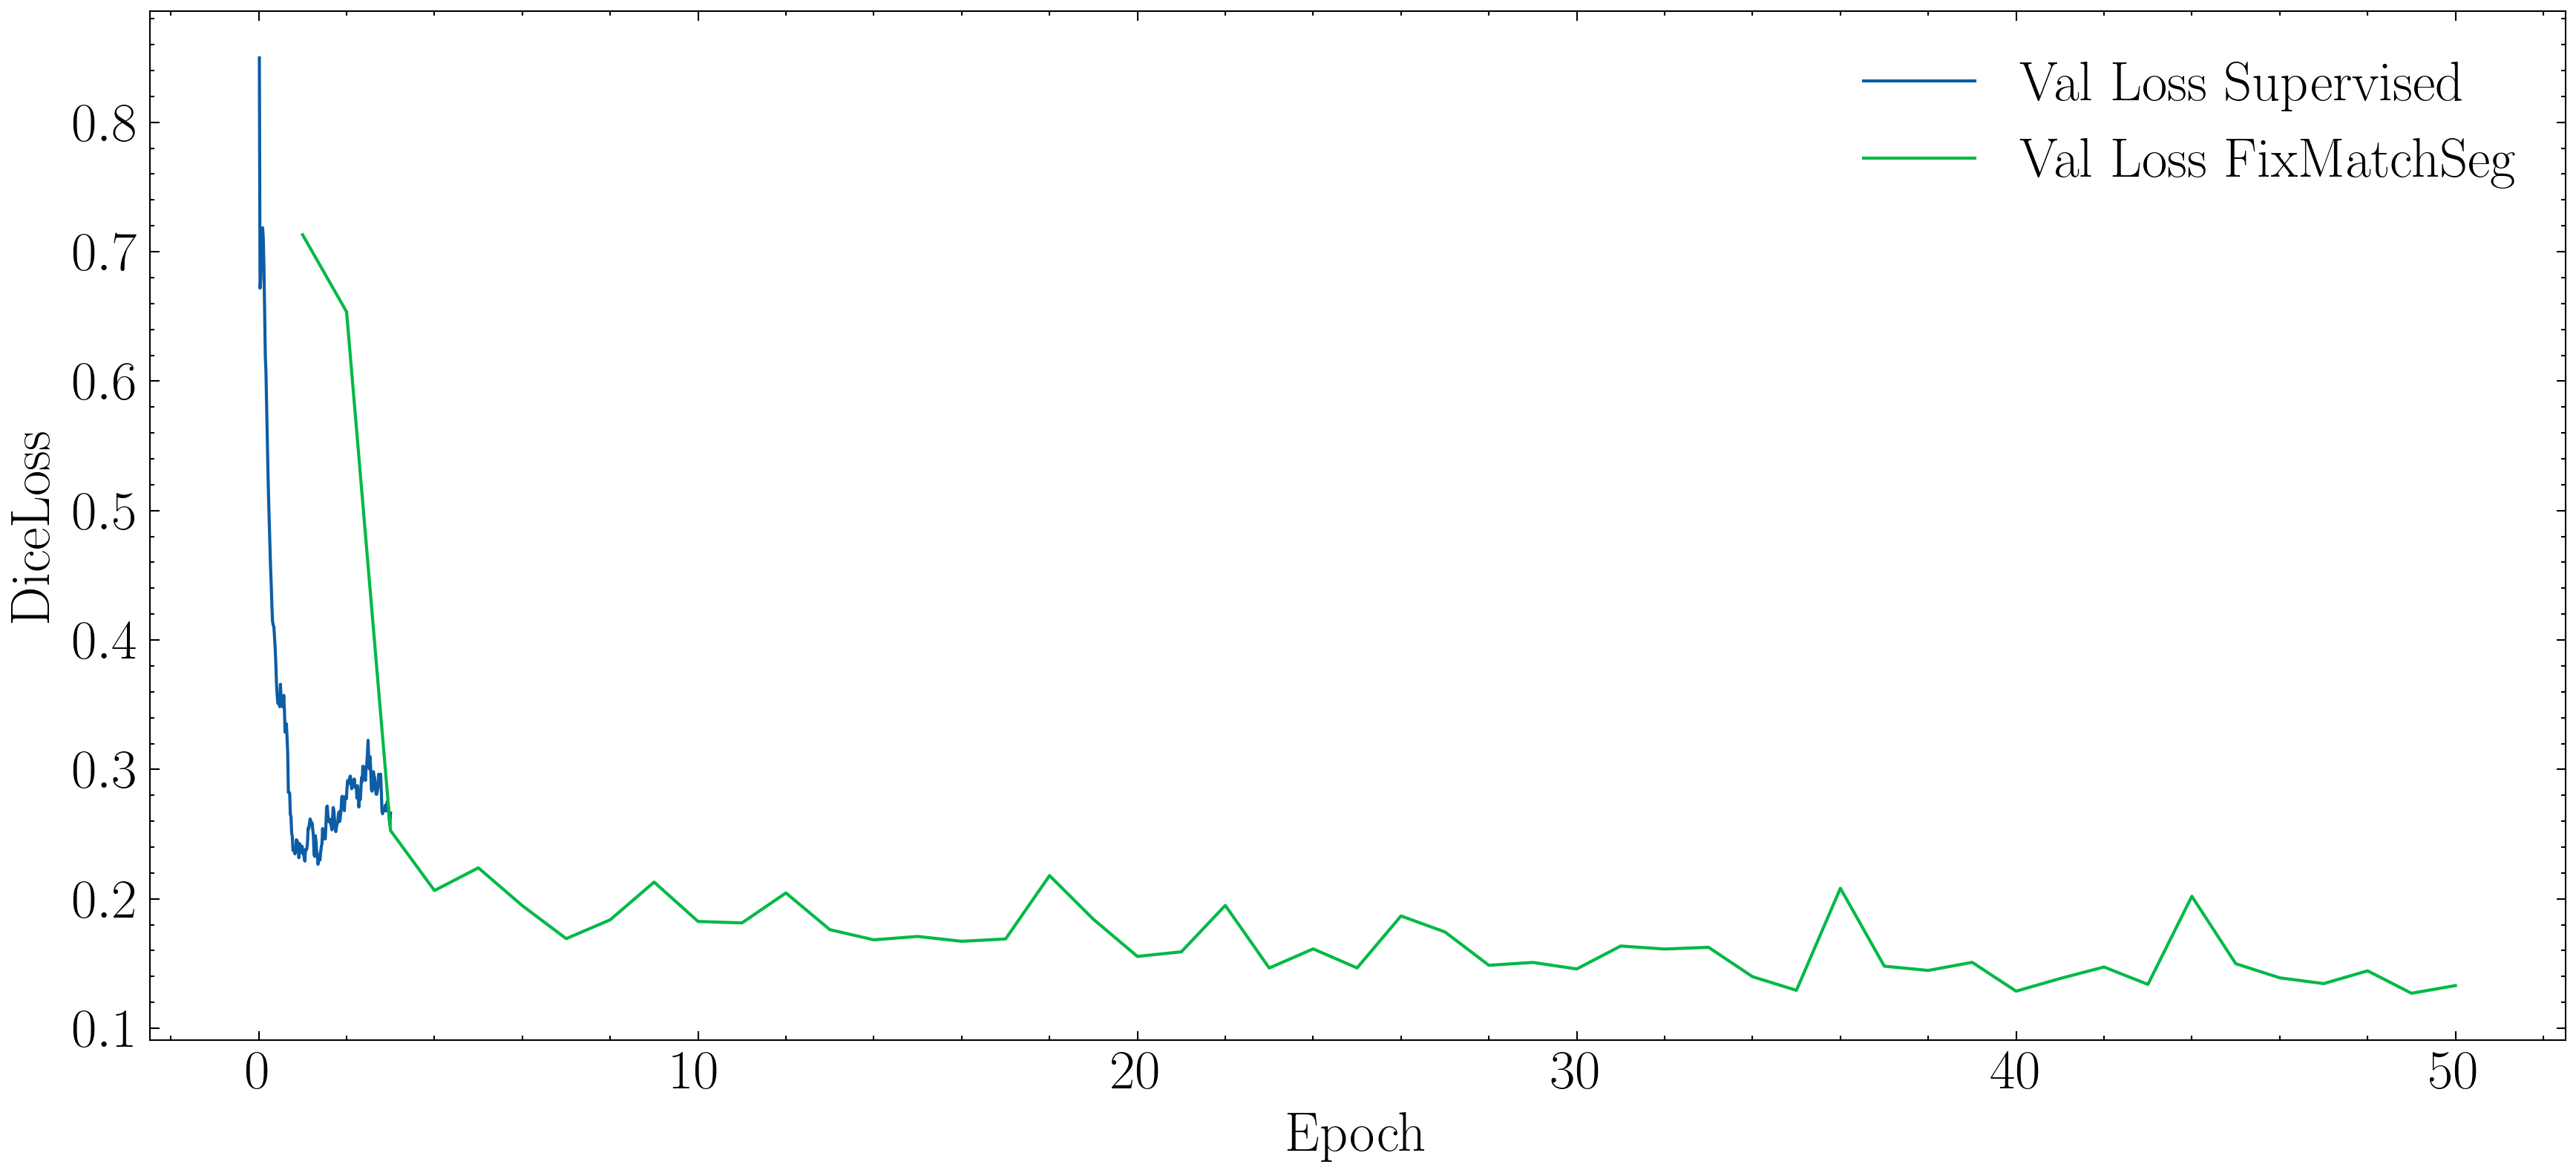

In [124]:
#plot_line_step(df, 'centralised_loss_epoch_validation', 'Val Loss Supervised', 0.25)
plot_line_step(df, 'centralised_loss_epoch_validation', 'Val Loss Supervised', 0.015)
plot_line(epoch_df, 'centralised_loss_epoch_validation', 'Val Loss FixMatchSeg')
#plt.savefig('fixmatchseg_loss_sup_unsup.png')

In [ ]:
!cp -R 